# **Más allá de las notas: IA para una orientación vocacional completa**

In [ ]:
! git clone https://github.com/Cristhian-Guerrero/data_modelo.git

fatal: destination path 'data_modelo' already exists and is not an empty directory.


In [ ]:
import pandas as pd

# Carga el dataset
file_path = '/content/data_modelo/bd_tratada.csv'
df = pd.read_csv(file_path)

# Función para dividir el dataset por año y período y uniformar los nombres de las columnas
def dividir_por_anio_periodo(df):
    # Obtiene las columnas únicas sin el identificador del estudiante
    columnas = [col for col in df.columns if col != 'id_estudiante']

    # Encuentra todos los años y períodos disponibles
    periodos = sorted(set(col.split('_')[-1] for col in columnas))
    anios = sorted(set(col.split('_')[-2] for col in columnas))

    # Diccionario para almacenar los diferentes datasets
    datasets = {}

    for anio in anios:
        for periodo in periodos:
            # Filtrar columnas por año y período
            columnas_filtradas = ['id_estudiante'] + [col for col in columnas if f'_{anio}_{periodo}' in col]
            # Crear un nuevo DataFrame para el año y período específico
            df_filtrado = df[columnas_filtradas].copy()
            # Renombrar las columnas para que sean uniformes
            df_filtrado.columns = ['id_estudiante'] + [col.rsplit('_', 2)[0] for col in columnas_filtradas[1:]]
            # Guardar el DataFrame en el diccionario
            datasets[f'{anio}_{periodo}'] = df_filtrado

    return datasets

# Aplicar la función para dividir el dataset y uniformar los nombres de las columnas
datasets_divididos = dividir_por_anio_periodo(df)

# Ejemplo: mostrar el dataset del año 6 y período 1
print(datasets_divididos['6_1'].head())

# Puedes guardar cada dataset en un archivo CSV si lo necesitas
for key, dataset in datasets_divididos.items():
    dataset.to_csv(f'dataset_{key}.csv', index=False)


   id_estudiante  Artes  Biología  C-Sociales  Economía  Edu-Física  Español  \
0              1   2.46      4.53        2.32      4.00        3.56     3.29   
1              2   3.44      1.86        1.74      1.03        3.28     2.90   
2              3   4.08      4.68        4.58      1.17        1.09     3.85   
3              4   1.63      1.94        3.84      4.74        1.65     3.04   
4              5   2.36      4.59        3.94      2.86        1.81     1.47   

   Filosofía  Informática  Inglés  ...  Arquitectura  Educación(STEM)  \
0       1.99         2.16    4.33  ...        3.3365           3.5665   
1       3.41         3.68    1.30  ...        2.7300           2.6100   
2       1.75         4.28    1.69  ...        3.5585           3.8000   
3       4.62         3.63    4.65  ...        3.2180           3.2850   
4       3.39         4.51    2.11  ...        3.3635           3.7710   

   Economía-finanzas  Finanzas RelacionesInte  Ing Agronómica  \
0             3

In [ ]:
import pandas as pd

# Carga el dataset
file_path = '/content/dataset_6_1.csv'
df6_1 = pd.read_csv(file_path)

In [ ]:
df6_1.head()

,id_estudiante,Artes,Biología,C-Sociales,Economía,Edu-Física,Español,Filosofía,Informática,Inglés,...,Arquitectura,Educación(STEM),Economía-finanzas,Finanzas RelacionesInte,Ing Agronómica,Biología y Biotecnología,Diseño Gráfico Industrial,Turismo y Hospitalidad,carrera_predominante,puntaje_carrera_predominante
0,1,2.46,4.53,2.32,4.00,3.56,3.29,1.99,2.16,4.33,...,3.3365,3.5665,3.3725,3.1830,3.6550,3.6350,3.1110,3.1245,Ing Mecánica _6_1,3.7160
1,2,3.44,1.86,1.74,1.03,3.28,2.90,3.41,3.68,1.30,...,2.7300,2.6100,2.2875,2.3460,2.3960,2.3980,2.8185,2.4015,Diseño Gráfico Industrial _6_1,2.8185
2,3,4.08,4.68,4.58,1.17,1.09,3.85,1.75,4.28,1.69,...,3.5585,3.8000,3.1760,3.3715,3.6635,3.5410,3.5275,3.3240,Ing Electrónica_6_1,3.8075
3,4,1.63,1.94,3.84,4.74,1.65,3.04,4.62,3.63,4.65,...,3.2180,3.2850,3.7945,3.7640,3.2750,3.2485,3.2215,3.6430,Economía-finanzas_6_1,3.7945
4,5,2.36,4.59,3.94,2.86,1.81,1.47,3.39,4.51,2.11,...,3.3635,3.7710,3.3755,3.3690,3.6695,3.6230,3.2290,3.1150,Ing Electrónica_6_1,3.9745


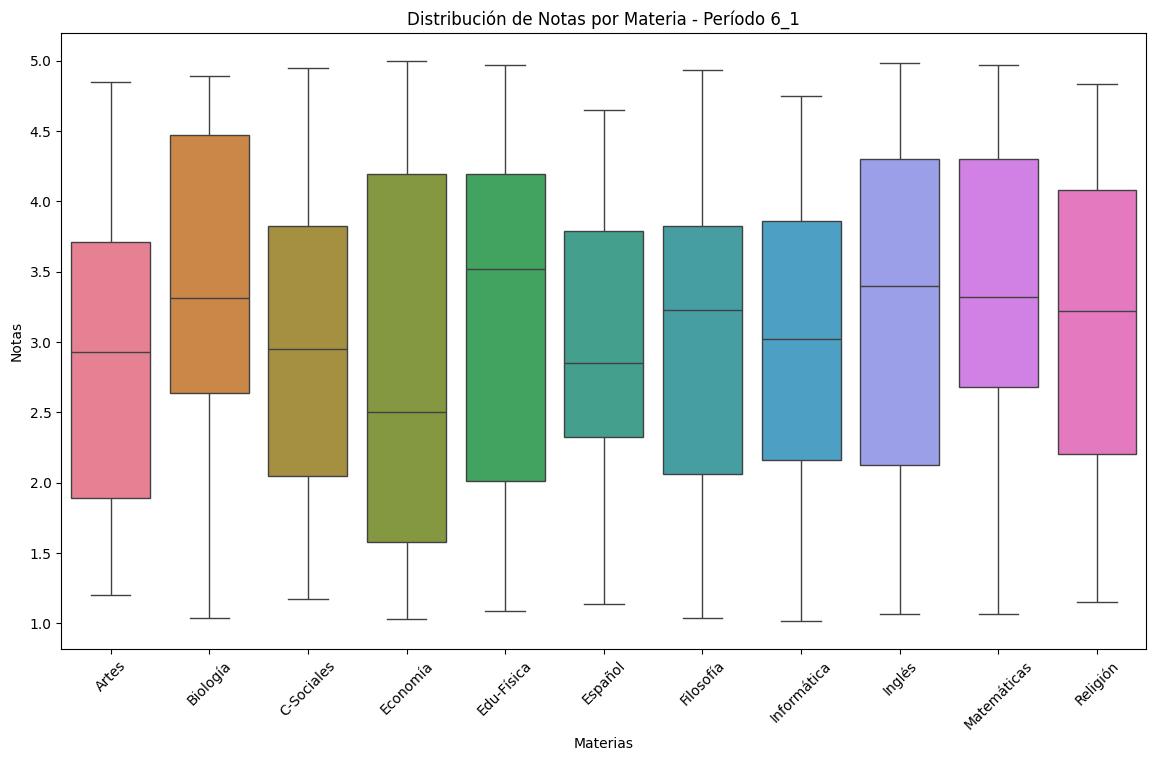

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Listamos las columnas de materias
materias = ['Artes', 'Biología', 'C-Sociales', 'Economía',
            'Edu-Física', 'Español', 'Filosofía', 'Informática',
            'Inglés', 'Matemáticas', 'Religión']

# Creamos un boxplot para cada materia
plt.figure(figsize=(14, 8))
sns.boxplot(data=df6_1[materias])
plt.title('Distribución de Notas por Materia - Período 6_1')
plt.xticks(rotation=45)
plt.ylabel('Notas')
plt.xlabel('Materias')
plt.show()


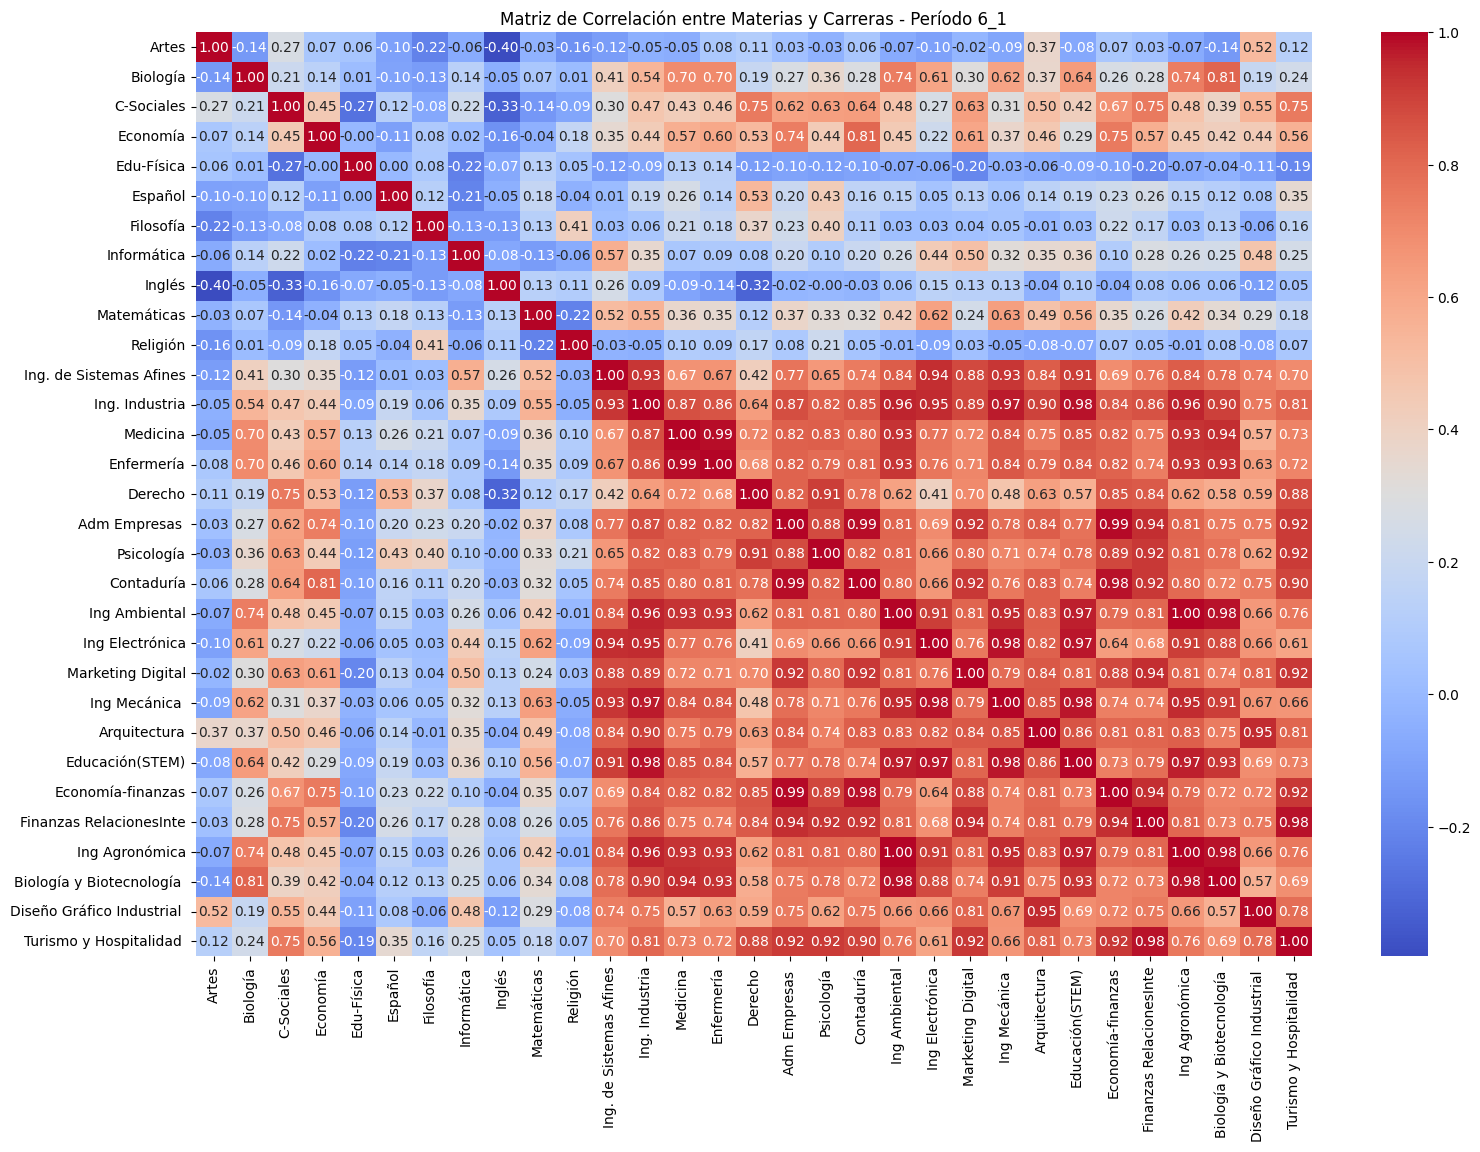

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionamos las columnas de materias y carreras
variables = ['Artes', 'Biología', 'C-Sociales', 'Economía',
             'Edu-Física', 'Español', 'Filosofía', 'Informática',
             'Inglés', 'Matemáticas', 'Religión',
             'Ing. de Sistemas Afines', 'Ing. Industria', 'Medicina',
             'Enfermería', 'Derecho', 'Adm Empresas ', 'Psicología',
             'Contaduría', 'Ing Ambiental', 'Ing Electrónica',
             'Marketing Digital', 'Ing Mecánica ', 'Arquitectura',
             'Educación(STEM)', 'Economía-finanzas', 'Finanzas RelacionesInte',
             'Ing Agronómica', 'Biología y Biotecnología ',
             'Diseño Gráfico Industrial ', 'Turismo y Hospitalidad ']

# Calculamos la matriz de correlación
correlation_matrix = df6_1[variables].corr()

# Visualizamos la matriz de correlación con un mapa de calor
plt.figure(figsize=(18, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación entre Materias y Carreras - Período 6_1')
plt.show()


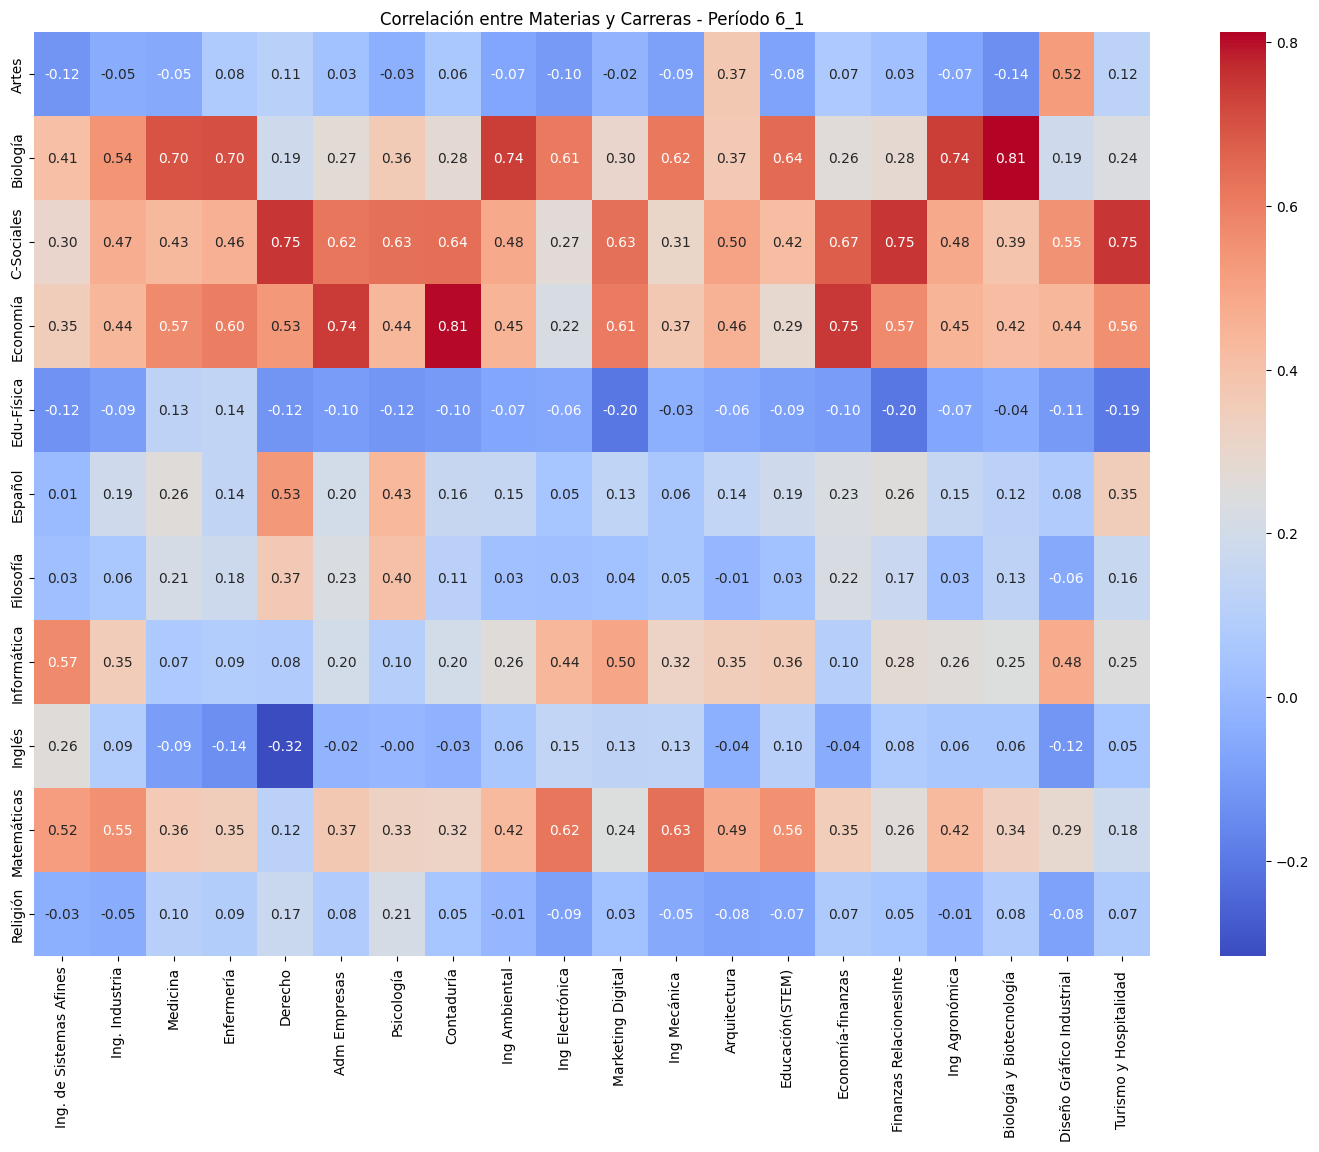

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Listamos las columnas de materias y carreras
materias = ['Artes', 'Biología', 'C-Sociales', 'Economía',
            'Edu-Física', 'Español', 'Filosofía', 'Informática',
            'Inglés', 'Matemáticas', 'Religión']

carreras = ['Ing. de Sistemas Afines', 'Ing. Industria', 'Medicina',
            'Enfermería', 'Derecho', 'Adm Empresas ', 'Psicología',
            'Contaduría', 'Ing Ambiental', 'Ing Electrónica',
            'Marketing Digital', 'Ing Mecánica ', 'Arquitectura',
            'Educación(STEM)', 'Economía-finanzas', 'Finanzas RelacionesInte',
            'Ing Agronómica', 'Biología y Biotecnología ',
            'Diseño Gráfico Industrial ', 'Turismo y Hospitalidad ']

# Calculamos la matriz de correlación entre las materias y las carreras
correlation_matrix = df6_1[materias + carreras].corr()

# Filtramos la matriz de correlación para obtener solo la correlación entre materias y carreras
correlation_matrix_filtered = correlation_matrix.loc[materias, carreras]

# Visualizamos la matriz de correlación con un mapa de calor
plt.figure(figsize=(18, 12))
sns.heatmap(correlation_matrix_filtered, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlación entre Materias y Carreras - Período 6_1')
plt.show()

# Mostrar la matriz de correlación en formato tabular
#print(correlation_matrix_filtered)


## Correlaciones Positivas y Negativas:

* **Correlaciones Positivas:** Los valores positivos indican que a medida que aumentan las notas en una materia, también tiende a aumentar la ponderación para una carrera específica.
* **Correlaciones Negativas:** Los valores negativos sugieren que un aumento en las notas de una materia está asociado con una disminución en la ponderación de una carrera específica.

### Identificación de Materias Influyentes:

* **Biología_6_1:** Tiene una fuerte correlación positiva con varias carreras, como:
  * Medicina_6_1 (0.695)
  * Enfermería_6_1 (0.704)
  * Biología y Biotecnología_6_1 (0.811)
  
  Esto sugiere que un buen desempeño en Biología está fuertemente asociado con una mayor ponderación en carreras relacionadas con ciencias de la salud y biotecnología.

* **Matemáticas_6_1:** También muestra correlaciones significativas con varias carreras, como:
  * Ing. Mecánica *6*1 (0.632)
  * Ing. Electrónica_6_1 (0.622)
  * Ingeniería de Sistemas Afines_6_1 (0.516)
  
  Esto indica que las notas en Matemáticas son importantes para las carreras de ingeniería.

* **C-Sociales_6_1:** Tiene una alta correlación con:
  * Derecho_6_1 (0.751)
  * Psicología_6_1 (0.631)
  * Varias otras carreras relacionadas con humanidades y ciencias sociales.

### Correlaciones Menores:

* **Artes_6_1 y Edu-Física_6_1:** Estas materias muestran correlaciones bajas o incluso negativas con la mayoría de las carreras. Esto podría indicar que:
  * No son determinantes principales en la ponderación de las carreras
  * Su influencia es más específica

  ----------------------------
  ----------------------------

In [ ]:
import pandas as pd

# Definimos las ponderaciones para cada carrera
ponderaciones_dict = {
    'Ing. de Sistemas Afines': [0.20, 0.05, 0.10, 0.05, 0.15, 0.00, 0.25, 0.05, 0.00, 0.05, 0.10],
    'Ing. Industrial': [0.20, 0.10, 0.15, 0.10, 0.10, 0.00, 0.15, 0.05, 0.00, 0.05, 0.10],
    'Medicina': [0.10, 0.10, 0.25, 0.05, 0.10, 0.05, 0.05, 0.05, 0.00, 0.10, 0.15],
    'Enfermería': [0.10, 0.10, 0.25, 0.05, 0.10, 0.05, 0.05, 0.05, 0.00, 0.10, 0.15],
    'Derecho': [0.05, 0.20, 0.05, 0.25, 0.10, 0.00, 0.05, 0.05, 0.05, 0.15, 0.05],
    'Adm Empresas': [0.15, 0.10, 0.05, 0.15, 0.10, 0.00, 0.10, 0.05, 0.00, 0.10, 0.20],
    'Psicología': [0.10, 0.15, 0.10, 0.20, 0.10, 0.00, 0.05, 0.05, 0.05, 0.15, 0.05],
    'Contaduría': [0.15, 0.10, 0.05, 0.15, 0.10, 0.00, 0.10, 0.05, 0.00, 0.05, 0.25],
    'Ing Ambiental': [0.15, 0.10, 0.25, 0.10, 0.10, 0.00, 0.10, 0.05, 0.00, 0.05, 0.10],
    'Ing Electrónica': [0.25, 0.05, 0.20, 0.05, 0.10, 0.00, 0.20, 0.05, 0.00, 0.05, 0.05],
    'Marketing Digital': [0.10, 0.10, 0.05, 0.15, 0.15, 0.00, 0.20, 0.05, 0.00, 0.05, 0.15],
    'Ing Mecánica': [0.25, 0.05, 0.20, 0.05, 0.10, 0.00, 0.15, 0.05, 0.00, 0.05, 0.10],
    'Arquitectura': [0.15, 0.10, 0.10, 0.05, 0.10, 0.00, 0.15, 0.20, 0.00, 0.05, 0.10],
    'Educación (STEM)': [0.20, 0.10, 0.20, 0.10, 0.10, 0.00, 0.15, 0.05, 0.00, 0.05, 0.05],
    'Economía-finanzas': [0.15, 0.10, 0.10, 0.20, 0.10, 0.00, 0.10, 0.05, 0.00, 0.10, 0.20],
    'Finanzas RelacionesInte': [0.10, 0.10, 0.05, 0.25, 0.15, 0.00, 0.10, 0.05, 0.00, 0.10, 0.10],
    'Ing Agronómica': [0.15, 0.10, 0.25, 0.10, 0.10, 0.00, 0.10, 0.05, 0.00, 0.05, 0.10],
    'Biología y Biotecnología': [0.10, 0.10, 0.30, 0.05, 0.10, 0.00, 0.10, 0.05, 0.00, 0.10, 0.10],
    'Diseño Gráfico Industrial': [0.10, 0.10, 0.05, 0.05, 0.10, 0.00, 0.20, 0.25, 0.00, 0.05, 0.10],
    'Turismo y Hospitalidad': [0.05, 0.15, 0.05, 0.20, 0.15, 0.00, 0.10, 0.10, 0.00, 0.10, 0.10]
}

# Convertimos el diccionario a un DataFrame
ponderaciones_df = pd.DataFrame.from_dict(ponderaciones_dict, orient='index',
                                          columns=['Matemáticas', 'Español', 'Biología', 'C-Sociales',
                                                   'Inglés', 'Edu-Física', 'Informática', 'Artes',
                                                   'Religión', 'Filosofía', 'Economía'])


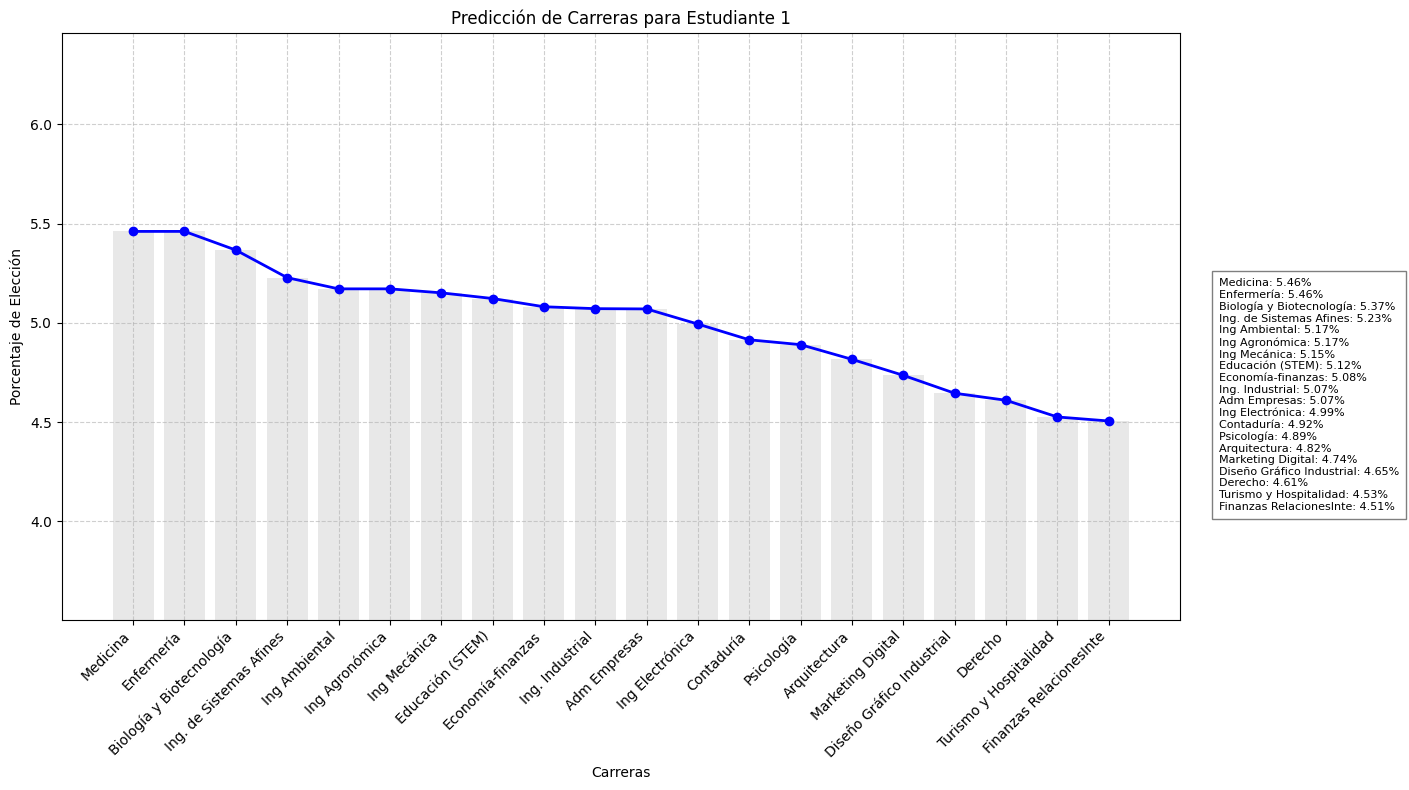

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import pandas as pd

# Carga el dataset
file_path = '/content/dataset_6_1.csv'
df6_1 = pd.read_csv(file_path)


# Input: Notas de las materias
X = df6_1[['Artes', 'Biología', 'C-Sociales', 'Economía', 'Edu-Física', 'Español', 'Filosofía', 'Informática', 'Inglés', 'Matemáticas', 'Religión']]

# Output: Puntajes ponderados (target)
y = X @ ponderaciones_df.T

# Split de los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo
model = MultiOutputRegressor(RandomForestRegressor(random_state=42))
model.fit(X_train, y_train)

# Predicciones
y_pred = model.predict(X_test)

# Convertimos los puntajes en porcentajes
y_pred_percent = (y_pred / y_pred.sum(axis=1, keepdims=True)) * 100

# Visualización para el primer estudiante
carreras = ponderaciones_df.index
porcentajes = y_pred_percent[0]

# Ordenar carreras y porcentajes de mayor a menor
sorted_indices = np.argsort(porcentajes)[::-1]
carreras_sorted = carreras[sorted_indices]
porcentajes_sorted = porcentajes[sorted_indices]

plt.figure(figsize=(12, 8))

# Fondo de barras semitransparente
plt.bar(carreras_sorted, porcentajes_sorted, color='lightgray', alpha=0.5)

# Gráfico de líneas superpuesto
plt.plot(carreras_sorted, porcentajes_sorted, marker='o', color='blue', linestyle='-', linewidth=2)

# Ajustar los límites del eje Y
plt.ylim(min(porcentajes) - 1, max(porcentajes) + 1)

plt.xlabel('Carreras')
plt.ylabel('Porcentaje de Elección')
plt.title('Predicción de Carreras para Estudiante 1')
plt.xticks(rotation=45, ha='right')  # Rotar las etiquetas del eje X para mejor legibilidad
plt.grid(True, linestyle='--', alpha=0.6)

# Estilización adicional
plt.tight_layout()  # Para ajustar los márgenes y que el gráfico se vea mejor

# Mostrar la lista ordenada a la derecha de la gráfica
plt.figtext(1.02, 0.5,
            '\n'.join([f"{carrera}: {porcentaje:.2f}%" for carrera, porcentaje in zip(carreras_sorted, porcentajes_sorted)]),
            ha="left", fontsize=8, va="center", bbox={"facecolor":"white", "alpha":0.5, "pad":5})

plt.show()


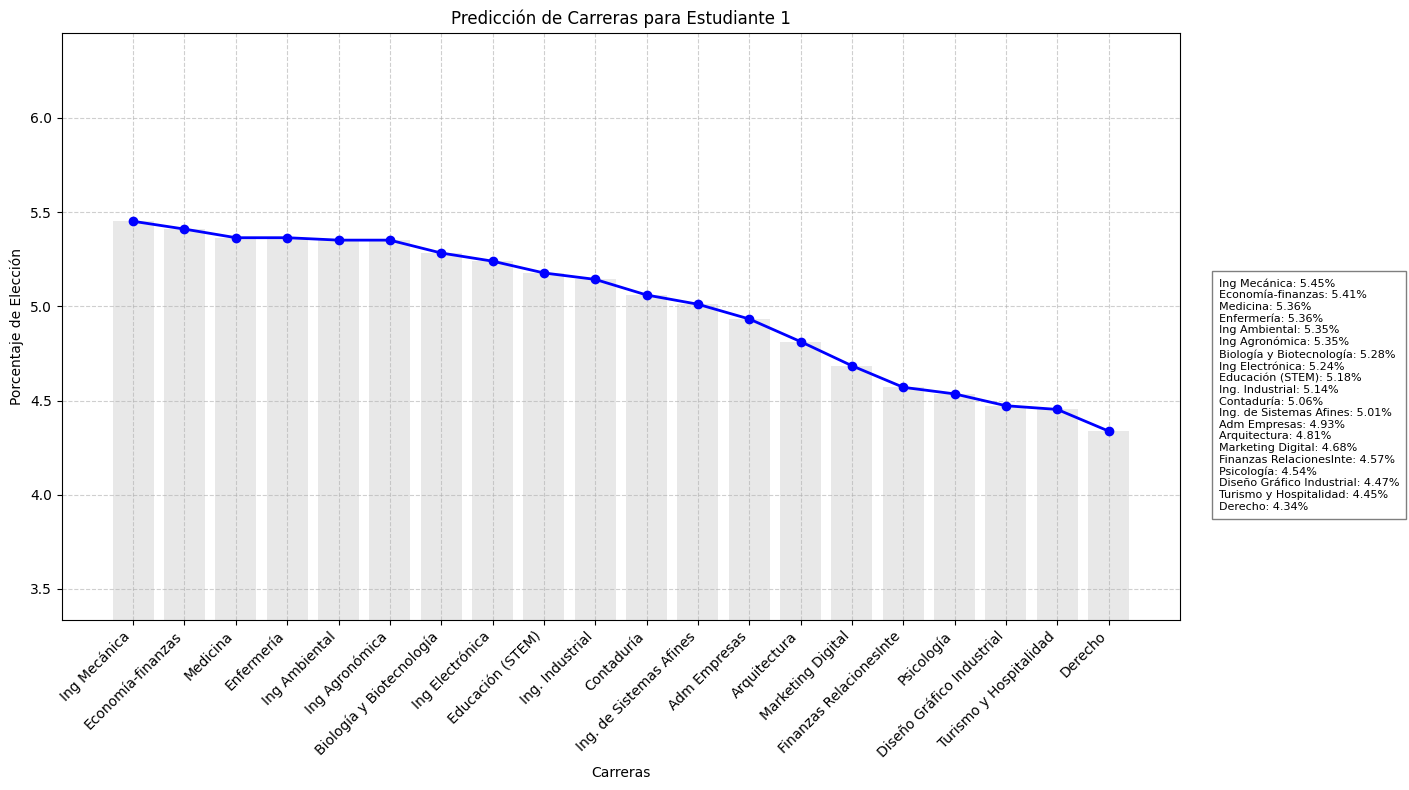

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Lista de rutas de archivos
rutas = [
    "/content/dataset_11_3.csv", "/content/dataset_11_2.csv", "/content/dataset_11_1.csv",
    "/content/dataset_10_3.csv", "/content/dataset_10_2.csv", "/content/dataset_10_1.csv",
    "/content/dataset_9_3.csv", "/content/dataset_9_2.csv", "/content/dataset_9_1.csv",
    "/content/dataset_8_3.csv", "/content/dataset_8_2.csv", "/content/dataset_8_1.csv",
    "/content/dataset_7_3.csv", "/content/dataset_7_2.csv", "/content/dataset_7_1.csv",
    "/content/dataset_6_3.csv", "/content/dataset_6_2.csv", "/content/dataset_6_1.csv",
]

# Cargar y combinar todos los datasets
df_consolidado = pd.concat([pd.read_csv(ruta) for ruta in rutas], ignore_index=True)

# Definir las columnas de entrada (notas de materias) y salida (ponderaciones de carreras)
X = df_consolidado[['Matemáticas', 'Español', 'Biología', 'C-Sociales',
                    'Inglés', 'Edu-Física', 'Informática', 'Artes',
                    'Religión', 'Filosofía', 'Economía']]

# Definir la matriz de ponderaciones (asegúrate de que el dataframe `ponderaciones_df` esté correctamente definido)
y = X @ ponderaciones_df.T  # Aplicar las ponderaciones para obtener el target

# Entrenar el modelo con todos los datos consolidados
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = MultiOutputRegressor(RandomForestRegressor(random_state=42))
model.fit(X_train, y_train)

# Realizar predicciones para un período específico
periodo_especifico = pd.read_csv("/content/dataset_6_1.csv")  # Ruta del periodo específico

X_periodo = periodo_especifico[['Matemáticas', 'Español', 'Biología', 'C-Sociales',
                                'Inglés', 'Edu-Física', 'Informática', 'Artes',
                                'Religión', 'Filosofía', 'Economía']]

y_pred_periodo = model.predict(X_periodo)

# Convertir los puntajes en porcentajes
y_pred_percent = (y_pred_periodo / y_pred_periodo.sum(axis=1, keepdims=True)) * 100

# Visualización para el primer estudiante
carreras = ponderaciones_df.index
porcentajes = y_pred_percent[0]

# Ordenar carreras y porcentajes de mayor a menor
sorted_indices = np.argsort(porcentajes)[::-1]
carreras_sorted = carreras[sorted_indices]
porcentajes_sorted = porcentajes[sorted_indices]

plt.figure(figsize=(12, 8))

# Fondo de barras semitransparente
plt.bar(carreras_sorted, porcentajes_sorted, color='lightgray', alpha=0.5)

# Gráfico de líneas superpuesto
plt.plot(carreras_sorted, porcentajes_sorted, marker='o', color='blue', linestyle='-', linewidth=2)

# Ajustar los límites del eje Y
plt.ylim(min(porcentajes_sorted) - 1, max(porcentajes_sorted) + 1)

plt.xlabel('Carreras')
plt.ylabel('Porcentaje de Elección')
plt.title('Predicción de Carreras para Estudiante 1')
plt.xticks(rotation=45, ha='right')  # Rotar las etiquetas del eje X para mejor legibilidad
plt.grid(True, linestyle='--', alpha=0.6)

# Estilización adicional
plt.tight_layout()  # Para ajustar los márgenes y que el gráfico se vea mejor

# Mostrar la lista ordenada a la derecha de la gráfica
plt.figtext(1.02, 0.5,
            '\n'.join([f"{carrera}: {porcentaje:.2f}%" for carrera, porcentaje in zip(carreras_sorted, porcentajes_sorted)]),
            ha="left", fontsize=8, va="center", bbox={"facecolor":"white", "alpha":0.5, "pad":5})

plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, classification_report

# Suprimir advertencias de LightGBM
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

# Lista de rutas de archivos
rutas = [
    "/content/dataset_11_3.csv", "/content/dataset_11_2.csv", "/content/dataset_11_1.csv",
    "/content/dataset_10_3.csv", "/content/dataset_10_2.csv", "/content/dataset_10_1.csv",
    "/content/dataset_9_3.csv", "/content/dataset_9_2.csv", "/content/dataset_9_1.csv",
    "/content/dataset_8_3.csv", "/content/dataset_8_2.csv", "/content/dataset_8_1.csv",
    "/content/dataset_7_3.csv", "/content/dataset_7_2.csv", "/content/dataset_7_1.csv",
    "/content/dataset_6_3.csv", "/content/dataset_6_2.csv", "/content/dataset_6_1.csv",
]

# Cargar y combinar todos los datasets
df_consolidado = pd.concat([pd.read_csv(ruta) for ruta in rutas], ignore_index=True)

# Definir las columnas de entrada (notas de materias) y salida (ponderaciones de carreras)
X = df_consolidado[['Matemáticas', 'Español', 'Biología', 'C-Sociales',
                    'Inglés', 'Edu-Física', 'Informática', 'Artes',
                    'Religión', 'Filosofía', 'Economía']]

# Definir la matriz de ponderaciones (asegúrate de que el dataframe `ponderaciones_df` esté correctamente definido)
y = X @ ponderaciones_df.T  # Aplicar las ponderaciones para obtener el target

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir diferentes modelos para comparar
modelos = {
    "RandomForest": MultiOutputRegressor(RandomForestRegressor(random_state=42)),
    "GradientBoosting": MultiOutputRegressor(GradientBoostingRegressor(random_state=42)),
    "XGBoost": MultiOutputRegressor(XGBRegressor(random_state=42)),
    "LightGBM": MultiOutputRegressor(LGBMRegressor(random_state=42, min_gain_to_split=0, verbose=-1)),
    "LinearRegression": MultiOutputRegressor(LinearRegression())
}

# Entrenar y evaluar cada modelo
for nombre_modelo, modelo in modelos.items():
    print(f"Evaluando el modelo: {nombre_modelo}")

    # Entrenar el modelo
    modelo.fit(X_train, y_train)

    # Realizar predicciones sobre el conjunto de prueba
    y_pred_test = modelo.predict(X_test)

    # Convertir los puntajes en porcentajes para el conjunto de prueba
    y_pred_test_percent = (y_pred_test / y_pred_test.sum(axis=1, keepdims=True)) * 100

    # Obtener las carreras predichas (la carrera con el puntaje más alto)
    carreras_predichas = np.array([ponderaciones_df.index[np.argmax(row)] for row in y_pred_test_percent])

    # Obtener las carreras reales
    carreras_reales = y_test.idxmax(axis=1).values

    # Calcular accuracy
    accuracy = accuracy_score(carreras_reales, carreras_predichas)

    # Imprimir accuracy
    print(f"Accuracy del modelo {nombre_modelo}: {accuracy:.2f}")

    # Calcular otras métricas (precisión, recall, f1-score)
    print("\nReporte de Clasificación:\n")
    print(classification_report(carreras_reales, carreras_predichas, zero_division=1))
    print("-" * 60)


Evaluando el modelo: RandomForest
Accuracy del modelo RandomForest: 0.67

Reporte de Clasificación:

                           precision    recall  f1-score   support

             Arquitectura       0.00      0.00      1.00         1
 Biología y Biotecnología       0.71      0.71      0.71        14
               Contaduría       0.00      1.00      0.00         0
                  Derecho       0.60      0.40      0.48        15
Diseño Gráfico Industrial       0.61      1.00      0.76        11
        Economía-finanzas       0.87      0.75      0.81        69
         Educación (STEM)       0.00      1.00      0.00         0
  Finanzas RelacionesInte       0.00      0.00      1.00         1
            Ing Ambiental       0.00      1.00      0.00         0
          Ing Electrónica       0.62      0.56      0.59         9
             Ing Mecánica       0.20      1.00      0.33         1
  Ing. de Sistemas Afines       0.67      0.60      0.63        10
        Marketing Digital  

Evaluando el modelo: RandomForest
Evaluando el modelo: GradientBoosting
Evaluando el modelo: XGBoost
Evaluando el modelo: LightGBM
Evaluando el modelo: LinearRegression


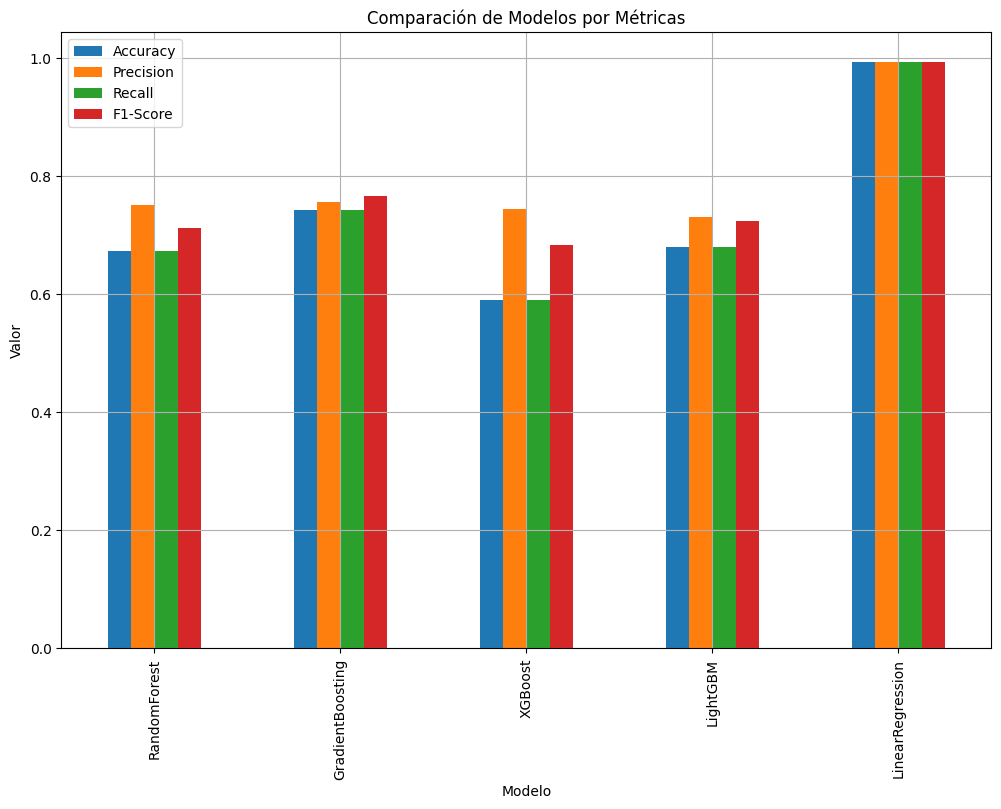

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Suprimir advertencias de LightGBM
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

# Lista de rutas de archivos
rutas = [
    "/content/dataset_11_3.csv", "/content/dataset_11_2.csv", "/content/dataset_11_1.csv",
    "/content/dataset_10_3.csv", "/content/dataset_10_2.csv", "/content/dataset_10_1.csv",
    "/content/dataset_9_3.csv", "/content/dataset_9_2.csv", "/content/dataset_9_1.csv",
    "/content/dataset_8_3.csv", "/content/dataset_8_2.csv", "/content/dataset_8_1.csv",
    "/content/dataset_7_3.csv", "/content/dataset_7_2.csv", "/content/dataset_7_1.csv",
    "/content/dataset_6_3.csv", "/content/dataset_6_2.csv", "/content/dataset_6_1.csv",
]

# Cargar y combinar todos los datasets
df_consolidado = pd.concat([pd.read_csv(ruta) for ruta in rutas], ignore_index=True)

# Definir las columnas de entrada (notas de materias) y salida (ponderaciones de carreras)
X = df_consolidado[['Matemáticas', 'Español', 'Biología', 'C-Sociales',
                    'Inglés', 'Edu-Física', 'Informática', 'Artes',
                    'Religión', 'Filosofía', 'Economía']]

# Definir la matriz de ponderaciones (asegúrate de que el dataframe `ponderaciones_df` esté correctamente definido)
y = X @ ponderaciones_df.T  # Aplicar las ponderaciones para obtener el target

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir diferentes modelos para comparar
modelos = {
    "RandomForest": MultiOutputRegressor(RandomForestRegressor(random_state=42)),
    "GradientBoosting": MultiOutputRegressor(GradientBoostingRegressor(random_state=42)),
    "XGBoost": MultiOutputRegressor(XGBRegressor(random_state=42)),
    "LightGBM": MultiOutputRegressor(LGBMRegressor(random_state=42, min_gain_to_split=0, verbose=-1)),
    "LinearRegression": MultiOutputRegressor(LinearRegression())
}

# Lista para almacenar los resultados
resultados = []

# Entrenar y evaluar cada modelo
for nombre_modelo, modelo in modelos.items():
    print(f"Evaluando el modelo: {nombre_modelo}")

    # Entrenar el modelo
    modelo.fit(X_train, y_train)

    # Realizar predicciones sobre el conjunto de prueba
    y_pred_test = modelo.predict(X_test)

    # Convertir los puntajes en porcentajes para el conjunto de prueba
    y_pred_test_percent = (y_pred_test / y_pred_test.sum(axis=1, keepdims=True)) * 100

    # Obtener las carreras predichas (la carrera con el puntaje más alto)
    carreras_predichas = np.array([ponderaciones_df.index[np.argmax(row)] for row in y_pred_test_percent])

    # Obtener las carreras reales
    carreras_reales = y_test.idxmax(axis=1).values

    # Calcular accuracy
    accuracy = accuracy_score(carreras_reales, carreras_predichas)

    # Calcular precision, recall, f1-score
    precision = precision_score(carreras_reales, carreras_predichas, average='weighted', zero_division=1)
    recall = recall_score(carreras_reales, carreras_predichas, average='weighted', zero_division=1)
    f1 = f1_score(carreras_reales, carreras_predichas, average='weighted', zero_division=1)

    # Agregar los resultados a la lista
    resultados.append({
        "Modelo": nombre_modelo,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1
    })

# Convertir la lista de resultados en un DataFrame
metricas_df = pd.DataFrame(resultados)

# Visualizar las métricas con gráficos de barras
metricas_df.set_index("Modelo", inplace=True)
metricas_df.plot(kind='bar', figsize=(12, 8))
plt.title('Comparación de Modelos por Métricas')
plt.ylabel('Valor')
plt.grid(True)
plt.show()


# Análisis de Modelos de Machine Learning

| Modelo            | Accuracy | Precision (macro avg) | Recall (macro avg) | F1-Score (macro avg) |
|-------------------|----------|------------------------|---------------------|----------------------|
| RandomForest      | 0.67     | 0.37                   | 0.68                | 0.46                 |
| GradientBoosting  | 0.74     | 0.42                   | 0.55                | 0.63                 |
| XGBoost           | 0.59     | 0.30                   | 0.66                | 0.45                 |
| LightGBM          | 0.68     | 0.32                   | 0.69                | 0.48                 |
| LinearRegression  | 0.99     | 0.99                   | 0.99                | 0.99                 |





## LinearRegression
- **Accuracy**: Extremadamente alta (0.99), sugiriendo un modelo muy bien ajustado.
- **Precision, Recall, F1-Score**: Todos muy altos, indicando un rendimiento general excelente.
- **Interpretación**: Posible sobreajuste (overfitting). El modelo podría haber memorizado los datos de entrenamiento en lugar de generalizar.

## GradientBoosting
- **Accuracy**: Sólido rendimiento (0.74), segundo mejor después de la regresión lineal.
- **Precision, Recall, F1-Score**: Valores equilibrados, indicando buen rendimiento sin problemas significativos de sobreajuste o subajuste.

## LightGBM
- **Accuracy**: Similar a RandomForest (0.68).
- **Precision, Recall, F1-Score**: Valores aceptables pero no tan altos como GradientBoosting. Posible necesidad de ajuste de hiperparámetros.

## RandomForest
- **Accuracy**: Decente pero no excepcional (0.67).
- **Precision, Recall, F1-Score**: Valores consistentes, pero con margen de mejora.

## XGBoost
- **Accuracy**: La menor precisión (0.59) en esta comparación.
- **Precision, Recall, F1-Score**: Sugiere que XGBoost no es el más adecuado para estos datos sin ajustes adicionales.

## Conclusión
1. **LinearRegression**: Rendimiento extremadamente alto, pero posible sobreajuste. Requiere revisión para confirmar generalización.
2. **GradientBoosting**: Modelo más equilibrado en términos de rendimiento, con buena precisión y puntuaciones F1.
3. **LightGBM y RandomForest**: Opciones viables, pero podrían necesitar ajustes adicionales.
4. **XGBoost**: No parece ser la mejor opción sin ajustes significativos.


Evaluando el modelo: RandomForest
Evaluando el modelo: GradientBoosting
Evaluando el modelo: XGBoost
Evaluando el modelo: LightGBM
Evaluando el modelo: LinearRegression


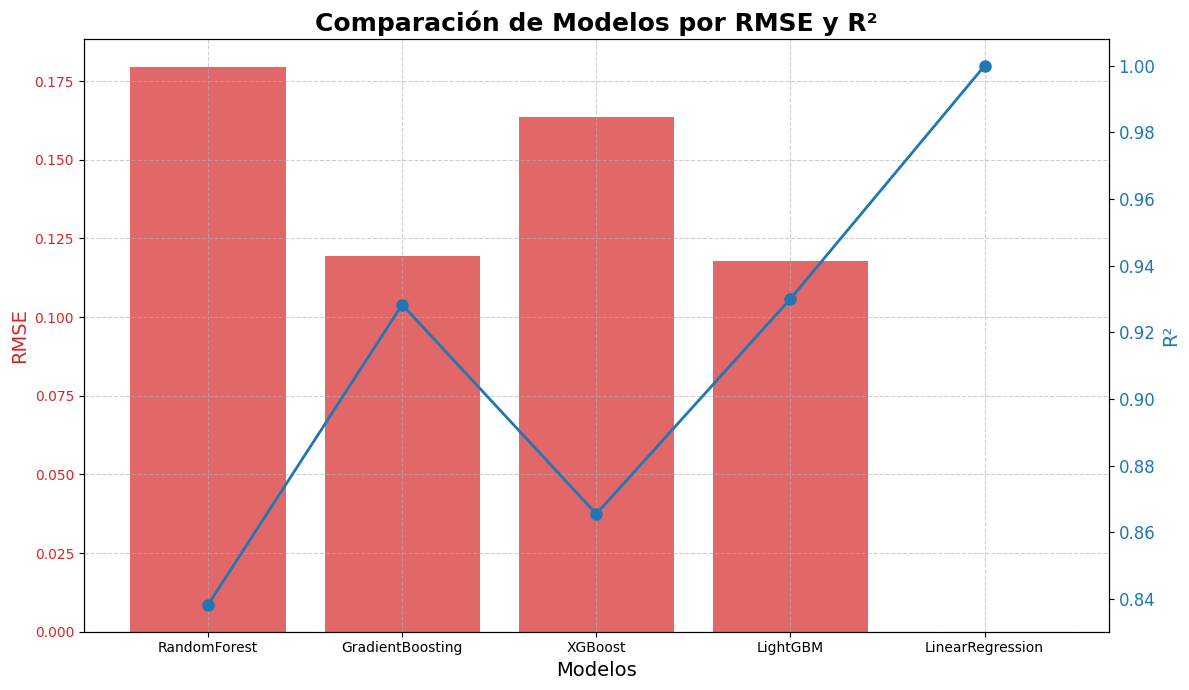

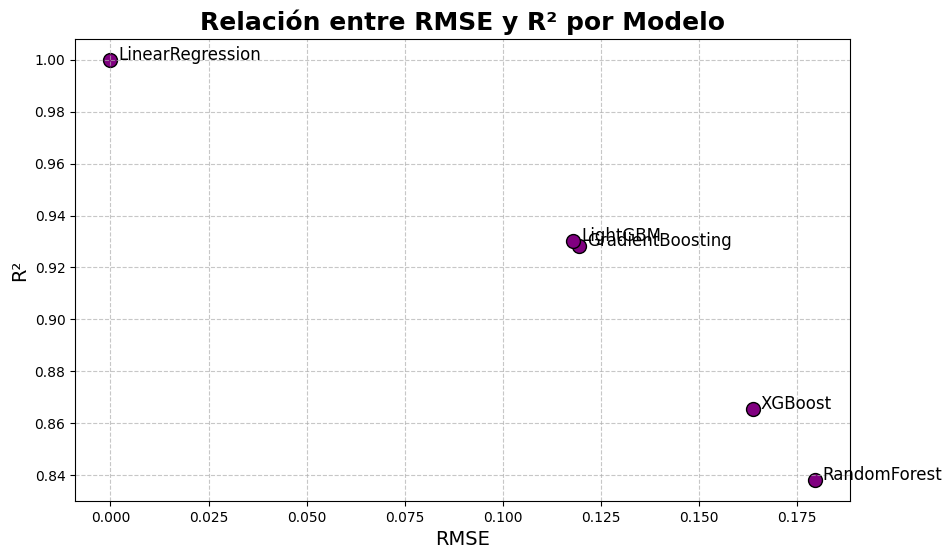

Resultados de la Comparación de Modelos:
          Modelo         RMSE       R2
    RandomForest 1.794829e-01 0.838265
GradientBoosting 1.193328e-01 0.928317
         XGBoost 1.636005e-01 0.865524
        LightGBM 1.178759e-01 0.930081
LinearRegression 7.354849e-16 1.000000


In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Suprimir advertencias de LightGBM
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

# Lista de rutas de archivos
rutas = [
    "/content/dataset_11_3.csv", "/content/dataset_11_2.csv", "/content/dataset_11_1.csv",
    "/content/dataset_10_3.csv", "/content/dataset_10_2.csv", "/content/dataset_10_1.csv",
    "/content/dataset_9_3.csv", "/content/dataset_9_2.csv", "/content/dataset_9_1.csv",
    "/content/dataset_8_3.csv", "/content/dataset_8_2.csv", "/content/dataset_8_1.csv",
    "/content/dataset_7_3.csv", "/content/dataset_7_2.csv", "/content/dataset_7_1.csv",
    "/content/dataset_6_3.csv", "/content/dataset_6_2.csv", "/content/dataset_6_1.csv",
]

# Cargar y combinar todos los datasets
df_consolidado = pd.concat([pd.read_csv(ruta) for ruta in rutas], ignore_index=True)

# Definir las columnas de entrada (notas de materias) y salida (ponderaciones de carreras)
X = df_consolidado[['Matemáticas', 'Español', 'Biología', 'C-Sociales',
                    'Inglés', 'Edu-Física', 'Informática', 'Artes',
                    'Religión', 'Filosofía', 'Economía']]

# Definir la matriz de ponderaciones (asegúrate de que el dataframe `ponderaciones_df` esté correctamente definido)
y = X @ ponderaciones_df.T  # Aplicar las ponderaciones para obtener el target

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir diferentes modelos para comparar
modelos = {
    "RandomForest": MultiOutputRegressor(RandomForestRegressor(random_state=42)),
    "GradientBoosting": MultiOutputRegressor(GradientBoostingRegressor(random_state=42)),
    "XGBoost": MultiOutputRegressor(XGBRegressor(random_state=42)),
    "LightGBM": MultiOutputRegressor(LGBMRegressor(random_state=42, min_gain_to_split=0, verbose=-1)),
    "LinearRegression": MultiOutputRegressor(LinearRegression())
}

# Lista para almacenar los resultados
resultados = []

# Entrenar y evaluar cada modelo
for nombre_modelo, modelo in modelos.items():
    print(f"Evaluando el modelo: {nombre_modelo}")

    # Entrenar el modelo
    modelo.fit(X_train, y_train)

    # Realizar predicciones sobre el conjunto de prueba
    y_pred_test = modelo.predict(X_test)

    # Calcular RMSE y R²
    rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
    r2 = r2_score(y_test, y_pred_test)

    # Agregar los resultados a la lista
    resultados.append({
        "Modelo": nombre_modelo,
        "RMSE": rmse,
        "R2": r2
    })

# Convertir la lista de resultados en un DataFrame
metricas_df = pd.DataFrame(resultados)

# Gráfico de Barras Mejorado
fig, ax1 = plt.subplots(figsize=(12, 7))

# Estilización del gráfico de barras
ax1.set_title('Comparación de Modelos por RMSE y R²', fontsize=18, fontweight='bold')
ax1.set_xlabel('Modelos', fontsize=14)
ax1.set_ylabel('RMSE', fontsize=14, color='tab:red')
ax1.bar(metricas_df['Modelo'], metricas_df['RMSE'], color='tab:red', alpha=0.7, label='RMSE')
ax1.tick_params(axis='y', labelcolor='tab:red')

# Gráfico de línea para R²
ax2 = ax1.twinx()
ax2.set_ylabel('R²', fontsize=14, color='tab:blue')
ax2.plot(metricas_df['Modelo'], metricas_df['R2'], color='tab:blue', marker='o', linestyle='-', linewidth=2, markersize=8)
ax2.tick_params(axis='y', labelcolor='tab:blue')

# Estilización adicional
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
ax1.grid(True, linestyle='--', alpha=0.6)

# Ajustar leyenda
fig.tight_layout()
plt.show()

# Gráfico de Dispersión para visualizar la relación entre RMSE y R²
plt.figure(figsize=(10, 6))
plt.scatter(metricas_df['RMSE'], metricas_df['R2'], color='purple', s=100, edgecolor='k')

for i in range(metricas_df.shape[0]):
    plt.text(metricas_df['RMSE'][i] + 0.002, metricas_df['R2'][i], metricas_df['Modelo'][i], fontsize=12)

plt.title('Relación entre RMSE y R² por Modelo', fontsize=18, fontweight='bold')
plt.xlabel('RMSE', fontsize=14)
plt.ylabel('R²', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# Imprimir los resultados para interpretación
print("Resultados de la Comparación de Modelos:")
print(metricas_df.to_string(index=False))


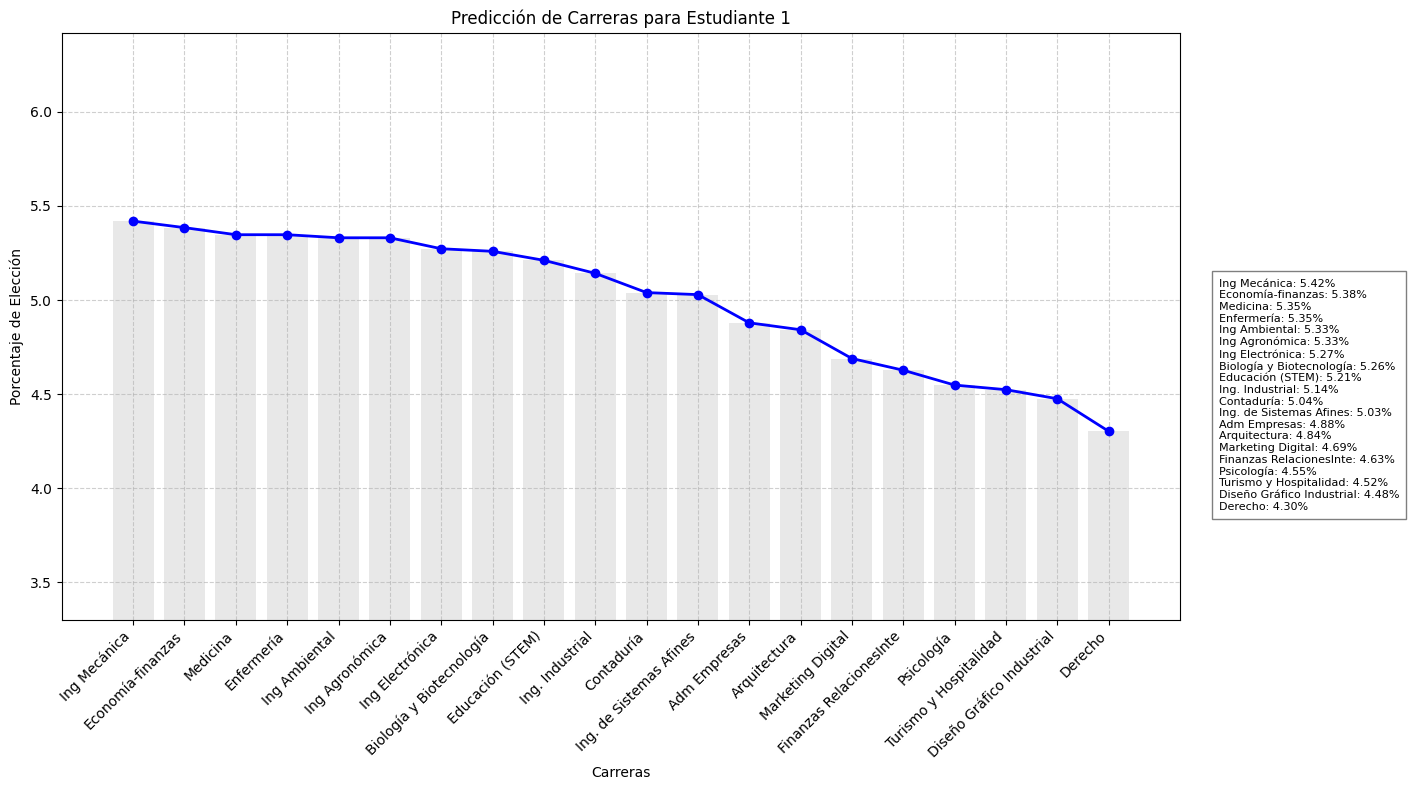

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Lista de rutas de archivos
rutas = [
    "/content/dataset_11_3.csv", "/content/dataset_11_2.csv", "/content/dataset_11_1.csv",
    "/content/dataset_10_3.csv", "/content/dataset_10_2.csv", "/content/dataset_10_1.csv",
    "/content/dataset_9_3.csv", "/content/dataset_9_2.csv", "/content/dataset_9_1.csv",
    "/content/dataset_8_3.csv", "/content/dataset_8_2.csv", "/content/dataset_8_1.csv",
    "/content/dataset_7_3.csv", "/content/dataset_7_2.csv", "/content/dataset_7_1.csv",
    "/content/dataset_6_3.csv", "/content/dataset_6_2.csv", "/content/dataset_6_1.csv",
]

# Cargar y combinar todos los datasets
df_consolidado = pd.concat([pd.read_csv(ruta) for ruta in rutas], ignore_index=True)

# Definir las columnas de entrada (notas de materias) y salida (ponderaciones de carreras)
X = df_consolidado[['Matemáticas', 'Español', 'Biología', 'C-Sociales',
                    'Inglés', 'Edu-Física', 'Informática', 'Artes',
                    'Religión', 'Filosofía', 'Economía']]

# Definir la matriz de ponderaciones (asegúrate de que el dataframe `ponderaciones_df` esté correctamente definido)
y = X @ ponderaciones_df.T  # Aplicar las ponderaciones para obtener el target

# Entrenar el modelo con todos los datos consolidados utilizando GradientBoosting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = MultiOutputRegressor(GradientBoostingRegressor(random_state=42))
model.fit(X_train, y_train)

# Realizar predicciones para un período específico
periodo_especifico = pd.read_csv("/content/dataset_6_1.csv")  # Ruta del periodo específico

X_periodo = periodo_especifico[['Matemáticas', 'Español', 'Biología', 'C-Sociales',
                                'Inglés', 'Edu-Física', 'Informática', 'Artes',
                                'Religión', 'Filosofía', 'Economía']]

y_pred_periodo = model.predict(X_periodo)

# Convertir los puntajes en porcentajes
y_pred_percent = (y_pred_periodo / y_pred_periodo.sum(axis=1, keepdims=True)) * 100

# Visualización para el primer estudiante
carreras = ponderaciones_df.index
porcentajes = y_pred_percent[0]

# Ordenar carreras y porcentajes de mayor a menor
sorted_indices = np.argsort(porcentajes)[::-1]
carreras_sorted = carreras[sorted_indices]
porcentajes_sorted = porcentajes[sorted_indices]

plt.figure(figsize=(12, 8))

# Fondo de barras semitransparente
plt.bar(carreras_sorted, porcentajes_sorted, color='lightgray', alpha=0.5)

# Gráfico de líneas superpuesto
plt.plot(carreras_sorted, porcentajes_sorted, marker='o', color='blue', linestyle='-', linewidth=2)

# Ajustar los límites del eje Y
plt.ylim(min(porcentajes_sorted) - 1, max(porcentajes_sorted) + 1)

plt.xlabel('Carreras')
plt.ylabel('Porcentaje de Elección')
plt.title('Predicción de Carreras para Estudiante 1')
plt.xticks(rotation=45, ha='right')  # Rotar las etiquetas del eje X para mejor legibilidad
plt.grid(True, linestyle='--', alpha=0.6)

# Estilización adicional
plt.tight_layout()  # Para ajustar los márgenes y que el gráfico se vea mejor

# Mostrar la lista ordenada a la derecha de la gráfica
plt.figtext(1.02, 0.5,
            '\n'.join([f"{carrera}: {porcentaje:.2f}%" for carrera, porcentaje in zip(carreras_sorted, porcentajes_sorted)]),
            ha="left", fontsize=8, va="center", bbox={"facecolor":"white", "alpha":0.5, "pad":5})

plt.show()
